# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [4]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

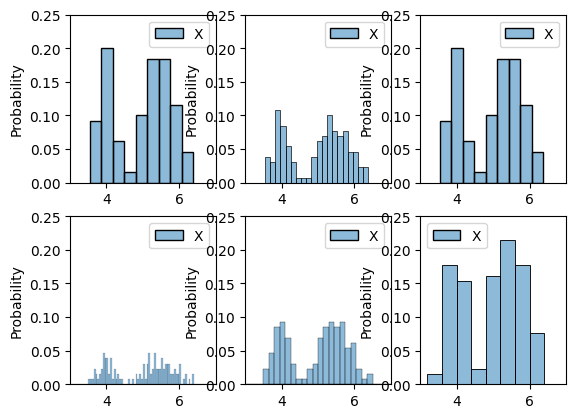

In [5]:
# YOUR CODE HERE
fig,axes=plt.subplots(nrows=2,ncols=3)
sns.histplot(data=sample,stat='probability',common_bins=True,ax=axes[0,0])
sns.histplot(data=sample,stat='probability',common_bins=True,bins=20,ax=axes[0,1])
sns.histplot(data=sample,stat='probability',common_bins=True,binwidth=0.3,ax=axes[0,2])
sns.histplot(data=sample,stat='probability',common_bins=True,binrange=(2,8),binwidth=0.05,ax=axes[1,0])
sns.histplot(data=sample,stat='probability',common_bins=True,binrange=(2,8),binwidth=0.15,ax=axes[1,1])
sns.histplot(data=sample,stat='probability',common_bins=True,binrange=(2,8),binwidth=0.4,ax=axes[1,2])

for ax in axes.flat:
    ax.set_ylim(0, 0.25)
    ax.set_xlim(3,7)
plt.show()
#raise NotImplementedError() cumulative zlicza wszystkie i dodaje kolejne
#

### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [15]:
def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
   
    min=data.min()
    max=data.max()
    std=np.std(data,axis=0);
    
    cdf=pd.DataFrame(columns=["X","KDE"]);
    # YOUR CODE HERE
min=sample.min()
max=sample.max()
#std=np.std(sample,axis=0)
std=0.2
probki=np.linspace(min-3*std,max+3*std,100)
kroki=np.diff(probki,axis=0)
f=[]
for x,y in zip(probki,range(0,(len(probki)-1))):
    fi=sp.stats.norm.pdf(sample,loc=x,scale=std)
    temp=np.sum(fi)
    f.append(temp)
f.sort()
print(f)
"""

# Konwersja danych do tablicy numpy
#data = np.asarray(data)
# Obliczenie minimum i maksimum danych
x_min = sample.min()
x_max = sample.max()
sigma=0.2
estimation_points=100
# Generowanie punktów estymacji
points = np.linspace(x_min - 3 * sigma, x_max + 3 * sigma, estimation_points)
points = points.ravel()
# Obliczenie wartości funkcji jądrowej dla każdego punktu estymacji
kde_values = np.zeros_like(points)
for i, point in enumerate(points):
    kde_values[i] = np.sum(sp.stats.norm.pdf(sample, loc=point, scale=sigma))
    # Standaryzacja wartości funkcji jądrowej
    d = (x_max - x_min) / (len(sample) - 1)
    area = np.sum(kde_values) * (points[1] - points[0])
    kde_values /= area
print(kde_values)


[4.84588268e-31 1.81827086e-33 3.36011693e-33 6.00510910e-33
 1.04064723e-32 1.75535675e-32 2.89758556e-32 4.71449961e-32
 7.62999055e-32 1.24175503e-31 2.05714811e-31 3.51332619e-31
 6.26166703e-31 1.17722719e-30 2.35498737e-30 5.04366084e-30
 1.16058299e-29 2.87237406e-29 7.63650605e-29 2.17347322e-28
 6.58641715e-28 2.10939853e-27 7.07381268e-27 2.45676008e-26
 8.72718215e-26 3.12805446e-25 1.11512398e-24 3.89628304e-24
 1.31512279e-23 4.22933533e-23 1.27958101e-22 3.60208042e-22
 9.35052786e-22 2.22414504e-21 4.83294955e-21 9.60446621e-21
 1.75680685e-20 2.99589160e-20 4.85843448e-20 7.68984733e-20
 1.22258451e-19 2.00428005e-19 3.45331793e-19 6.32209425e-19
 1.23611265e-18 2.58714742e-18 5.80284700e-18 1.39526604e-17
 3.59373343e-17 9.89452760e-17 2.90171059e-16 9.01932177e-16
 2.95333848e-15 1.01178195e-14 3.60025450e-14 1.32093406e-13
 4.96250688e-13 1.89680582e-12 7.33513619e-12 2.85607723e-11
 1.11515773e-10 4.35078829e-10 1.69062075e-09 6.52161408e-09
 2.48875203e-08 9.359475

In [7]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

AssertionError: 

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

In [ ]:
# Figura 1
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Figura 2
# YOUR CODE HERE
raise NotImplementedError()

### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

YOUR ANSWER HERE

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [ ]:
def cdf_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco wartości próby losowej,
        F_d - wartości dystrybuanty empirycznej,
        F_d_min - dolna granica przedziału ufności,
        F_d_max - górna granica przedziału ufności.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))